In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymgcv import terms as t
from pymgcv.gam import gam
from pymgcv.plot import plot_1d

n = 500
rng = np.random.default_rng(42)

x0 =  rng.normal(0, 1, size=n)
x1 = rng.normal(0, 1, size=n)
x2 = rng.normal(0, 1, size=n)
x3 = rng.normal(0, 1, size=n)
y = 0.2*x0 + np.cos(x1) + 0.2*x2 + 1*x3**2 + 3 + rng.normal(0, 1, size=n)

data = pd.DataFrame({"x0": x0, "x1": x1, "x2": x2, "x3": x3, "y": y })

/home/dw16200/projects/pymgcv/.pixi/envs/dev/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/home/dw16200", R: "/home/dw16200/projects/pymgcv/docs/examples"
  warnings.warn(
/home/dw16200/projects/pymgcv/.pixi/envs/dev/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/tmp/RtmpTsK4Jw", R: "/tmp/Rtmp5YAASz"
  warnings.warn(


In [2]:
terms = [t.Linear("x0"), t.TensorSmooth("x1","x2"), t.Smooth("x3")]

fitted_gam = gam(
    dependent="y",
    terms=terms,
    data=data,
)

fitted_terms  = fitted_gam.predict_terms(data)  # TODO se_fit -> se:

plot_1d(
    idx=2, # TODO better way to specify
    gam=fitted_gam,
    fitted_terms=fitted_terms["fit"],
    partial_residual_kwargs={"s": 0.1},
    lims=(-3, 3),
    )



TypeError: plot_1d() got an unexpected keyword argument 'idx'

TypeError: plot_1d() got an unexpected keyword argument 'data'

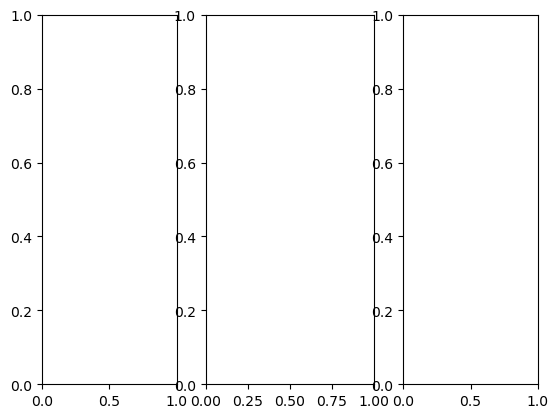

In [ ]:

fig, axes = plt.subplots(
    ncols=len(terms),
    width_ratios=[2, 2.5, 2],
    )

plot_1d(
    terms[0],
    gam=fitted_gam,
    fitted_terms=fitted_terms,
    lims=(-3,3),
    ax=axes[0],
    data=data, 
    partial_residual_kwargs={"s": 0.1},
    )
plot_smooth_2d(terms[1], fitted_gam, x1_lims=(-3, 3), x2_lims=(-3, 3), ax=axes[1])
plot_1d(terms[2], fitted_gam, (-3, 3), ax=axes[2], data=data, partial_residual_kwargs={"s": 0.1})
fig.set_size_inches(6, 2, forward=True)
fig.tight_layout()

In [ ]:
# from pymgcv.plot import get_plot_data
# from pymgcv.converters import to_py
# data = get_plot_data(
#     idx=2,  # Confusing for python users!
#     fitted_terms=fitted_terms["fit"],
#     gam=fitted_gam,
# )
# fit = to_py(data.rx2["fit"])
# residuals = to_py(data.rx2["res"])


TypeError: get_plot_data() missing 1 required positional argument: 'lims'

In [29]:
residuals.head()

,x,y
1,-0.566295,-1.274024
2,-0.624603,-1.346097
3,1.325147,1.254482
4,0.330290,-0.651260
5,-0.211734,-2.184217


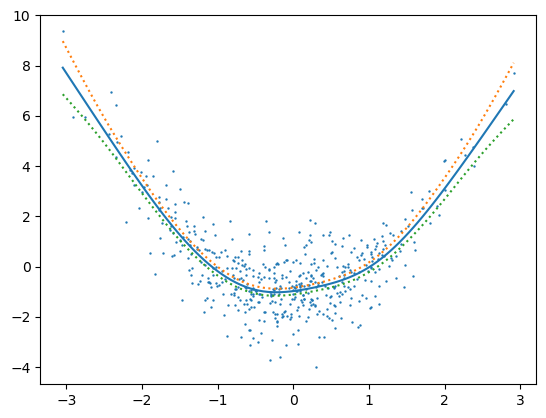

In [32]:
plt.scatter(residuals["x"], residuals["y"], s=0.5)
plt.plot(fit["x"], fit["y"])
plt.plot(fit["x"], fit["y"] + 2*fit["se"], linestyle=":")
plt.plot(fit["x"], fit["y"] - 2*fit["se"], linestyle=":")



In [18]:
residuals.head()

,x,y
1,-0.566295,-1.274024
2,-0.624603,-1.346097
3,1.325147,1.254482
4,0.330290,-0.651260
5,-0.211734,-2.184217


In [3]:
terms = [t.Linear("x0"), t.TensorSmooth("x1","x2"), t.Smooth("x3")]

fitted_gam = gam(
    dependent="y",
    terms=terms,
    data=data,
)

fitted_gam.predict_term(t.Linear("x0"), data)

{'fit':            x0
 0    0.084561
 1   -0.288602
 2    0.208255
 3    0.261013
 4   -0.541425
 ..        ...
 495  0.259620
 496 -0.508227
 497 -0.093133
 498 -0.552463
 499 -0.414889
 
 [500 rows x 1 columns],
 'se':            x0
 0    0.014636
 1    0.049952
 2    0.036045
 3    0.045176
 4    0.093711
 ..        ...
 495  0.044935
 496  0.087965
 497  0.016120
 498  0.095621
 499  0.071810
 
 [500 rows x 1 columns]}

TypeError: Data must be a pandas DataFrame.

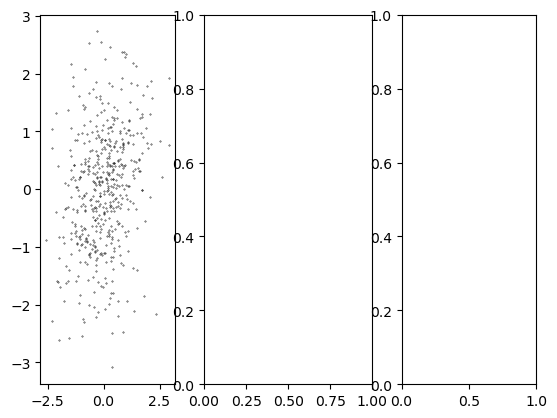

In [10]:
print(fitted_gam.summary())  # TODO to print_summary function?


Family: gaussian 
Link function: identity 

Formula:
y ~ x0 + s(x1, x2) + s(x3)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.62866    0.04505 102.742  < 2e-16 ***
x0           0.27702    0.04781   5.794 1.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df       F p-value    
s(x1,x2) 12.310 16.852   6.587  <2e-16 ***
s(x3)     5.546  6.738 153.513  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.709   Deviance explained =   72%
GCV = 1.0566  Scale est. = 1.0146    n = 500
